# Titanic Data Set - Classification Problem
### Author: Eren ERİŞ


In [1]:
#İmport Liblary
import pandas as pd
from sklearn.model_selection import train_test_split;
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [35]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [36]:
df = pd.concat([df_train,df_test])

In [37]:
# EDA Analysis

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.shape

(1309, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [42]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<Axes: >

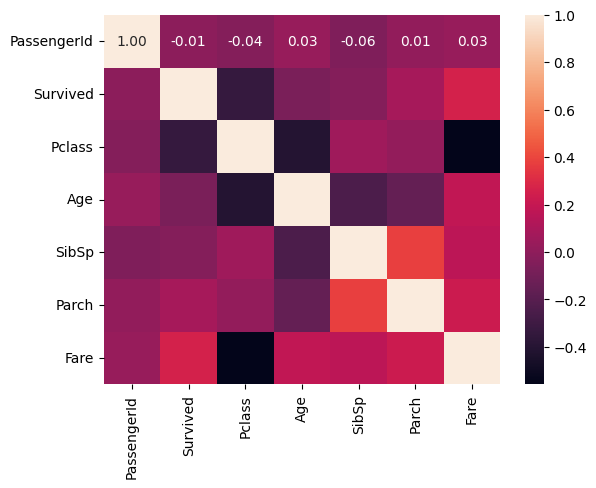

In [43]:
sns.heatmap(df.corr(numeric_only=True)
            ,annot=True,fmt='.2f')

In [44]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [45]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [46]:
df['Embarked'] = df['Embarked'].fillna("S")

AttributeError: 'numpy.float64' object has no attribute 'startswith'

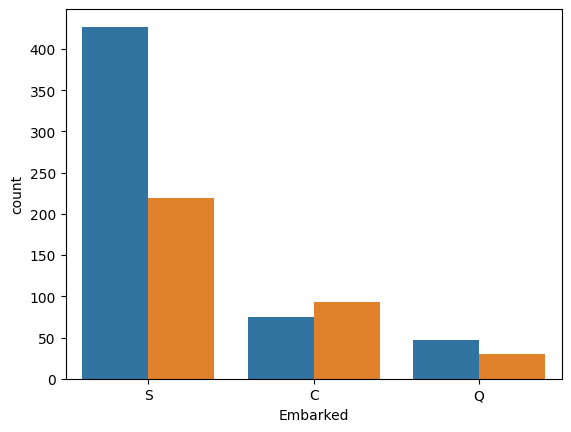

In [14]:
sns.countplot(x=df["Embarked"],hue=df["Survived"]);

In [47]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=True)
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [48]:
df["Title"]=df["Title"].replace(["Ms","Mle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")

In [49]:
del df["Name"]
del df["Cabin"]

In [50]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
Title            0
dtype: int64

In [51]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

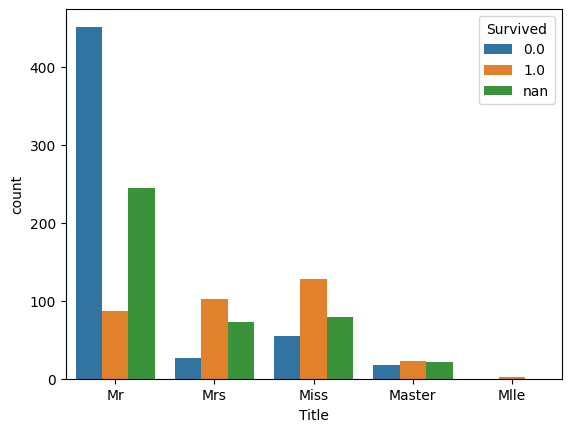

In [24]:
df["Title"] = df["Title"].astype(str)
df["Survived"] = df["Survived"].astype(str)
sns.countplot(x=df["Title"],hue=df["Survived"]);

In [52]:
df['Age'] = df['Age'].fillna(df.groupby("Title")["Age"].transform("median")) #Empty Age Data Change Age Mean Value

In [53]:
df=pd.get_dummies(df,drop_first=True)

In [54]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Ticket_110413,Ticket_110465,...,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,1,0,7.2500,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,2,1.0,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,1.0,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,4,1.0,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,5,0.0,3,35.0,0,0,8.0500,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [59]:
train = df[:891]
test=df[891:]

In [1]:
x=train.drop('Survived',axis=1)
y=train['Survived']

NameError: name 'train' is not defined

In [ ]:
df_scrore = pd.DataFrame() 
np = []

In [ ]:
# Random Forest Class

In [67]:
R = RandomForestClassifier()
R.fit(x,y)

RandomForestClassifier()

In [69]:
del test["Survived"]

In [70]:
test['Survived'] = R.predict(test)

C:\Users\EREN\AppData\Local\Temp\ipykernel_4152\3941753884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Survived'] = R.predict(test)


In [74]:
sonuc = df_test[["PassengerId"]]
sonuc["Survived"] = test['Survived'].astype("int64")

C:\Users\EREN\AppData\Local\Temp\ipykernel_4152\3234773822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"] = test['Survived'].astype("int64")


In [75]:
sonuc.to_csv("titanicPredict.csv",index=False)